In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import nltk
from scipy.sparse import hstack
import joblib
import requests



In [161]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\mohamed
[nltk_data]     ajmal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [162]:
data_f = pd.read_csv("C:/Users/mohamed ajmal/OneDrive/Desktop/hack/Fake.csv")
data_t = pd.read_csv("C:/Users/mohamed ajmal/OneDrive/Desktop/hack/True.csv")

In [163]:
data_f.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [164]:
data_t.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [165]:
data_t["class"]=0
data_f["class"]=1

In [166]:
data_t.shape,data_f.shape

((21417, 5), (23481, 5))

In [167]:
data_f_manual_testing = data_f.tail(10)
for i in range(23480,23470,-1):
    data_f.drop([i],axis = 0, inplace = True)

    
data_t_manual_testing = data_t.tail(10)
for i in range(21416,21406,-1):
    data_t.drop([i],axis = 0, inplace = True)

In [168]:
data_t.shape,data_f.shape

((21407, 5), (23471, 5))

In [169]:
data_t_manual_testing['class']=0
data_f_manual_testing['class']=1

C:\Users\mohamed ajmal\AppData\Local\Temp\ipykernel_14584\688480368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_t_manual_testing['class']=0
C:\Users\mohamed ajmal\AppData\Local\Temp\ipykernel_14584\688480368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f_manual_testing['class']=1


In [170]:
data_t_manual_testing.tail(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",0
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",0
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",0
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [171]:
data_f_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",1
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",1
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",1
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",1
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",1
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [172]:
data_merge=pd.concat([data_t,data_f],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


In [173]:
print("Column names:", data.columns)

Column names: Index(['text', 'class', 'sentiment'], dtype='object')


In [174]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [175]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [176]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [177]:
data = data.sample(frac = 1)

In [178]:
data.head()

,text,class
19723,NEW YORK (Reuters) - President Donald Trump wi...,0
3219,WASHINGTON (Reuters) - The U.S. Supreme Court ...,0
3855,WASHINGTON (Reuters) - Vice President Mike Pen...,0
20969,MOSCOW (Reuters) - Russia is ready to consider...,0
15101,There seems to be a trend with the GOP preside...,1


In [179]:
def clean_text(text):
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text



In [180]:
data['text'] = data['text'].apply(clean_text)

In [181]:
sia = SentimentIntensityAnalyzer()

In [182]:
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [183]:
data['sentiment'] = data['text'].apply(get_sentiment)

In [184]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_features = tfidf_vectorizer.fit_transform(data['text'])

In [185]:
sentiment_scores = data['sentiment'].values.reshape(-1, 1)
sentiment_sparse = hstack([tfidf_features, sentiment_scores])

In [186]:
print("First few rows of data:\n", data.head())


First few rows of data:
                                                     text  class  sentiment
19723  NEW YORK Reuters  President Donald Trump will ...      0     0.6949
3219   WASHINGTON Reuters  The US Supreme Court on Tu...      0    -0.9531
3855   WASHINGTON Reuters  Vice President Mike Pence ...      0     0.8360
20969  MOSCOW Reuters  Russia is ready to consider a ...      0     0.8052
15101  There seems to be a trend with the GOP preside...      1     0.9981


In [187]:
data.columns = [col.strip() for col in data.columns]

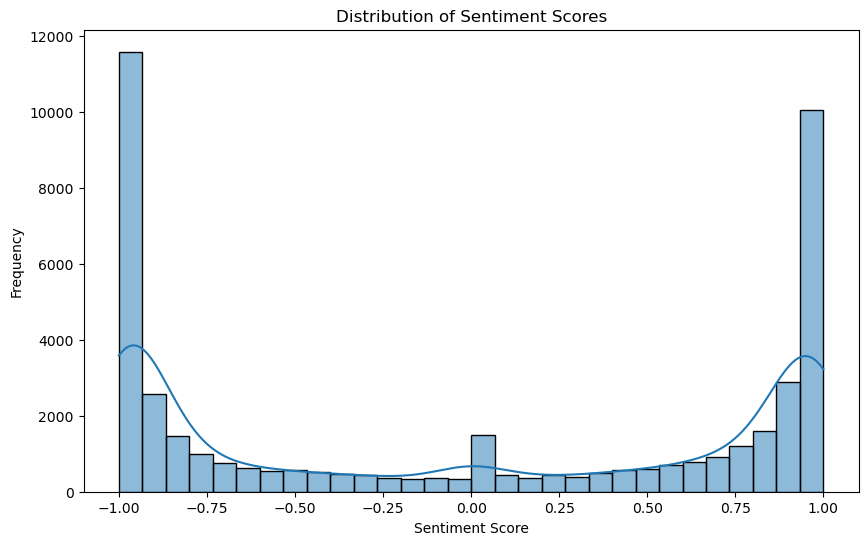

In [188]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [189]:
x = data['text']
y = data['class']

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [194]:
pred_lr = LR.predict(xv_test)

In [195]:
LR.score(xv_test, y_test)

0.9866310160427807

In [196]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5305
           1       0.99      0.98      0.99      5915

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [197]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [198]:
xv_test = vectorization.transform(x_test)

In [199]:
pred_dt=DT.predict(xv_test)

In [200]:
DT.score(xv_test,y_test)

0.9958110516934047

In [201]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5305
           1       0.99      0.98      0.99      5915

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [202]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [203]:
pred_gb = GB.predict(xv_test)

In [204]:
GB.score(xv_test, y_test)

0.9957219251336898

In [205]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5305
           1       1.00      0.99      1.00      5915

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [206]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [207]:
pred_rf = RF.predict(xv_test)

In [208]:
RF.score(xv_test, y_test)

0.9852941176470589

In [209]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5305
           1       0.99      0.98      0.99      5915

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [221]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

In [224]:


def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = tfidf_vectorizer.transform(new_x_test).toarray()
    new_sentiment_scores = new_def_test["text"].apply(lambda x: sia.polarity_scores(x)['compound']).values.reshape(-1, 1)
    new_X = np.hstack((new_xv_test, new_sentiment_scores))


In [229]:
news = str(input()) 
manual_testing(news)


MOSCOW (Reuters) - Russiaâ€™s former ambassador to Washington, Sergei Kislyak, said on Saturday his conversations with former White House national security adviser Michael Flynn had been transparent and focused on matters of U.S.-Russia cooperation. Kislyak ended his tenure in Washington in July but remains a key figure in ongoing U.S. investigations into Moscowâ€™s alleged meddling in the 2016 presidential election. Flynn was forced to resign in February after it became known that he had failed to disclose the content of conversations he had with Kislyak and misled U.S. Vice-President Mike Pence about their meetings. â€œWe only spoke about the most simple things ... but the communication was completely correct, calm, absolutely transparent. In any case, there were no secrets on our side,â€ Kislyak said during a panel discussion on Russian television. â€œThere are a number of issues which are important for cooperation between Russia and the United States - most of all, terrorism. And 